In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from xgboost import XGBClassifier # Importamos el clasificador de XGBoost
from sklearn.preprocessing import StandardScaler # Para escalar, si es necesario

In [2]:
# Cargar el archivo de datos
# Asegúrate de que la ruta sea correcta o que el archivo esté en el mismo directorio
try:
    dfC = pd.read_excel("ClusteringClientes.xlsx")
except FileNotFoundError:
    print("Error: Asegúrate de que 'ClusteringClientes.xlsx' esté en el directorio correcto.")
    exit()

In [3]:
dfC.head(2)

,EMAIL,SBol_Vend,Prom_Pagado,Sum_Pagado,%_Promo,Prom_Horas_Ant,Venta_Ant,Recencia,PAGO_EFECTIVO,PAGO_TARJETA,DESC_ADULTO,DESC_DISCAPACIDAD,DESC_ESTUDIANTE,DESC_MENOR,DESC_PETFRIENDLY,DESC_PROFESOR,DESC_PROMOCION ESPECIAL,DESC_SENECTUD,Cluster
0,00-MAZA.ESQUISTOSO@ICLOUD.COM,4,953.664978,3814.659912,6.25,2.5,0.75,190,1,0,0,0,0,0,0,0,1,0,5
1,0022ANDREAGONZALEZ@GMAIL.COM,2,504.309998,1008.619995,0.00,24.5,0.50,781,0,1,0,0,1,0,0,0,0,0,2


In [4]:
# Seleccionar el 90% (tu muestra aleatoria)
df = dfC.sample(frac=0.9)

# Seleccionar el 10% restante (el complemento)
# Se obtienen los índices que NO fueron seleccionados en el paso anterior
df10 = dfC.drop(df.index)

In [5]:
df.head(2)

,EMAIL,SBol_Vend,Prom_Pagado,Sum_Pagado,%_Promo,Prom_Horas_Ant,Venta_Ant,Recencia,PAGO_EFECTIVO,PAGO_TARJETA,DESC_ADULTO,DESC_DISCAPACIDAD,DESC_ESTUDIANTE,DESC_MENOR,DESC_PETFRIENDLY,DESC_PROFESOR,DESC_PROMOCION ESPECIAL,DESC_SENECTUD,Cluster
101063,fernando.homero.gomez.valles@ejemplo.com,1,1198.280029,1198.280029,0.0,2.0,0.00,252,1,0,1,0,0,0,0,0,0,0,7
8993,CLAUDIA_ALTAMIRANO82@HOTMAIL.COM,4,944.395020,3777.580078,5.0,10.5,0.75,325,0,1,0,0,0,0,0,0,1,0,3


In [6]:
df10.head(2)

,EMAIL,SBol_Vend,Prom_Pagado,Sum_Pagado,%_Promo,Prom_Horas_Ant,Venta_Ant,Recencia,PAGO_EFECTIVO,PAGO_TARJETA,DESC_ADULTO,DESC_DISCAPACIDAD,DESC_ESTUDIANTE,DESC_MENOR,DESC_PETFRIENDLY,DESC_PROFESOR,DESC_PROMOCION ESPECIAL,DESC_SENECTUD,Cluster
13,0916OLGUINIVAN@GMAIL.COM,2,930.599976,1861.199951,10.0,3.0,0.0,674,1,0,0,0,0,0,0,0,1,0,5
22,123ZRON@GMAIL.COM,2,991.380005,1982.760010,5.0,298.0,1.0,494,0,1,0,0,0,0,0,0,1,0,3


In [7]:
# 1. Limpieza y Definición de X y y
X = df.drop(['EMAIL', 'Cluster'], axis=1) # Excluir EMAIL y ambas columnas de cluster
y = df['Cluster']
num_clases_final = y.nunique()

In [8]:
X.head(2)

,SBol_Vend,Prom_Pagado,Sum_Pagado,%_Promo,Prom_Horas_Ant,Venta_Ant,Recencia,PAGO_EFECTIVO,PAGO_TARJETA,DESC_ADULTO,DESC_DISCAPACIDAD,DESC_ESTUDIANTE,DESC_MENOR,DESC_PETFRIENDLY,DESC_PROFESOR,DESC_PROMOCION ESPECIAL,DESC_SENECTUD
101063,1,1198.280029,1198.280029,0.0,2.0,0.00,252,1,0,1,0,0,0,0,0,0,0
8993,4,944.395020,3777.580078,5.0,10.5,0.75,325,0,1,0,0,0,0,0,0,1,0


In [9]:
# 2. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y
)
print(f"Datos listos. Clases finales: {num_clases_final}. Filas de entrenamiento: {X_train.shape[0]}")


# --- 2. Entrenamiento del Modelo XGBoost Básico ---

xgb_model_baseline = XGBClassifier(
    objective='multi:softmax',
    num_class=num_clases_final,
    eval_metric='mlogloss',
    n_estimators=100,
    random_state=42
)

print("\nIniciando entrenamiento básico de XGBoost...")
xgb_model_baseline.fit(X_train, y_train)
y_pred_baseline = xgb_model_baseline.predict(X_test)


# --- 3. Evaluación del Modelo Básico ---

print("\n" + "="*50)
print("--- Evaluación del Modelo Básico ---")

accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Precisión (Accuracy) General: {accuracy:.4f}")

print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_baseline))


Datos listos. Clases finales: 9. Filas de entrenamiento: 86450

Iniciando entrenamiento básico de XGBoost...

--- Evaluación del Modelo Básico ---
Precisión (Accuracy) General: 0.9994

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2424
           1       1.00      1.00      1.00      2472
           2       1.00      1.00      1.00      2964
           3       1.00      1.00      1.00      3273
           4       1.00      1.00      1.00       601
           5       1.00      1.00      1.00       879
           6       1.00      1.00      1.00       818
           7       1.00      1.00      1.00     22716
           8       0.99      0.99      0.99       903

    accuracy                           1.00     37050
   macro avg       1.00      1.00      1.00     37050
weighted avg       1.00      1.00      1.00     37050



In [10]:
y_test, y_pred_baseline

(82824     7
 58714     7
 109558    7
 80189     7
 2339      2
          ..
 104434    7
 39294     3
 27291     6
 42810     0
 54387     7
 Name: Cluster, Length: 37050, dtype: int64,
 array([7, 7, 7, ..., 6, 0, 7]))

In [11]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Supongamos que estas son tus etiquetas reales y tus predicciones
# y_test: Etiquetas verdaderas (Clústeres reales de prueba)
# y_pred: Predicciones del modelo

# Calcula la matriz de confusión
matriz_de_confusion = confusion_matrix(y_test, y_pred_baseline)

print("Matriz de Confusión (Formato Array de NumPy):")
print(matriz_de_confusion)

Matriz de Confusión (Formato Array de NumPy):
[[ 2422     0     1     1     0     0     0     0     0]
 [    0  2472     0     0     0     0     0     0     0]
 [    0     0  2964     0     0     0     0     0     0]
 [    2     0     0  3271     0     0     0     0     0]
 [    0     0     0     0   601     0     0     0     0]
 [    0     0     0     0     0   879     0     0     0]
 [    0     0     0     0     0     0   818     0     0]
 [    0     0     0     0     0     0     0 22708     8]
 [    0     0     0     0     0     0     0     9   894]]


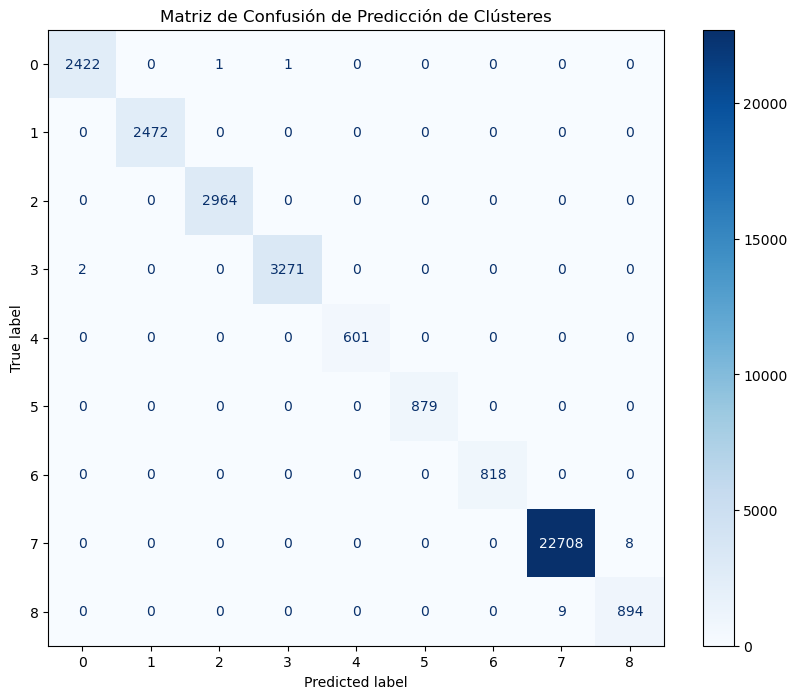

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Crear una lista con los nombres de las clases (Clústeres 0, 1, 2,...)
clases = [str(c) for c in sorted(y_test.unique())]

# Crear el objeto de visualización
disp = ConfusionMatrixDisplay(
    confusion_matrix=matriz_de_confusion,
    display_labels=clases # Etiquetas de los clústeres
)

# Dibujar y mostrar el mapa de calor
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='d') # 'd' para formato de entero
ax.set_title('Matriz de Confusión de Predicción de Clústeres')

plt.show()

In [13]:
# 1. Limpieza y Definición de X y y
X10 = df10.drop(['EMAIL', 'Cluster'], axis=1) # Excluir EMAIL y ambas columnas de cluster
y10 = df10['Cluster']

In [14]:
X10.head(2)

,SBol_Vend,Prom_Pagado,Sum_Pagado,%_Promo,Prom_Horas_Ant,Venta_Ant,Recencia,PAGO_EFECTIVO,PAGO_TARJETA,DESC_ADULTO,DESC_DISCAPACIDAD,DESC_ESTUDIANTE,DESC_MENOR,DESC_PETFRIENDLY,DESC_PROFESOR,DESC_PROMOCION ESPECIAL,DESC_SENECTUD
13,2,930.599976,1861.199951,10.0,3.0,0.0,674,1,0,0,0,0,0,0,0,1,0
22,2,991.380005,1982.760010,5.0,298.0,1.0,494,0,1,0,0,0,0,0,0,1,0


In [15]:
y_pred10 = xgb_model_baseline.predict(X10)


accuracy = accuracy_score(y10, y_pred10)
print(f"Precisión (Accuracy) General: {accuracy:.4f}")

print("\nInforme de Clasificación:")
print(classification_report(y10, y_pred10))

Precisión (Accuracy) General: 0.9999

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       916
           1       1.00      1.00      1.00       985
           2       1.00      1.00      1.00      1091
           3       1.00      1.00      1.00      1223
           4       1.00      1.00      1.00       231
           5       1.00      1.00      1.00       344
           6       1.00      1.00      1.00       319
           7       1.00      1.00      1.00      8279
           8       1.00      1.00      1.00       334

    accuracy                           1.00     13722
   macro avg       1.00      1.00      1.00     13722
weighted avg       1.00      1.00      1.00     13722



In [ ]:
# ----------------------------------------------------------------------
## 4. Pasos Siguientes: Ajuste de Hiperparámetros (Grid Search) 🚀
# Usamos f1_weighted, ya que es la mejor métrica para multi-clase con posible desbalance.

# Definición del Grid de parámetros a probar
param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.05],
}

print("\n" + "="*50)
print("--- Iniciando Grid Search para Optimización (Scoring: F1 Ponderado) ---")

grid_search = GridSearchCV(
    estimator=XGBClassifier(
        objective='multi:softmax', 
        num_class=num_clases_final, 
        eval_metric='mlogloss', 
        random_state=42, 
        use_label_encoder=False
    ),
    param_grid=param_grid,
    scoring='f1_weighted', # Métrica robusta para clasificación multi-clase
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_

print(f"\nMejor F1-Score Ponderado encontrado: {grid_search.best_score_:.4f}")
print(f"Mejores Parámetros: {grid_search.best_params_}")

# Evaluación del Modelo Final
y_pred_final = best_xgb_model.predict(X_test)

print("\n--- Evaluación del Modelo Optimizado ---")
print(f"Precisión (Accuracy) Final en Prueba: {accuracy_score(y_test, y_pred_final):.4f}")
print(classification_report(y_test, y_pred_final))


In [ ]:
# ----------------------------------------------------------------------
## 5. Pasos Siguientes: Importancia de las Características 💡
# Analizar qué variables son las más importantes para distinguir los clusters.

feature_importances = best_xgb_model.feature_importances_
feature_names = X.columns

# Crear un DataFrame para la visualización
df_importancia = pd.DataFrame({
    'Característica': feature_names,
    'Importancia': feature_importances
}).sort_values(by='Importancia', ascending=False)

print("\n" + "="*50)
print("--- Importancia de las Características (Top 10) ---")
print("Estas son las variables clave que definen los Clusters:")
print(df_importancia.head(10).to_string(index=False))